## Akses API covid19.go.id

In [1]:
import requests
resp = requests.get('https://data.covid19.go.id/public/api/update.json')

## Status Code

In [3]:
print (resp) #200 = Permintaan sukses dipenuhi.

<Response [200]>


## Headers API

In [4]:
print (resp.headers)

{'Server': 'nginx', 'Date': 'Tue, 17 Nov 2020 02:52:44 GMT', 'Content-Type': 'application/json', 'Last-Modified': 'Tue, 17 Nov 2020 02:48:28 GMT', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'ETag': 'W/"5fb339fc-18453"', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


## Ekstrak Respon

In [5]:
cov_id_raw = resp.json()

In [6]:
print('Length of cov_id_raw : %d.' %len(cov_id_raw))
print('Komponen cov_id_raw : %s.' %cov_id_raw.keys())
cov_id_update = cov_id_raw['update']

Length of cov_id_raw : 2.
Komponen cov_id_raw : dict_keys(['data', 'update']).


## Analisa Data

Sekarang fokus pada obyek cov_id_update untuk menjawab pertanyaan-pertanyaan berikut:

    - Kapan tanggal pembaharuan data penambahan kasus?
    - Berapa jumlah penambahan kasus sembuh?
    - Berapa jumlah penambahan kasus meninggal?
    - Berapa jumlah total kasus positif hingga saat ini?
    - Berapa jumlah total kasus meninggal hingga saat ini?


In [7]:
print('Tanggal pembaharuan data penambahan kasus :', cov_id_update['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh :', cov_id_update['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal :', cov_id_update['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini :', cov_id_update['total']['jumlah_positif'])
print('Jumlah total kasus meninggal hingga saat ini:', cov_id_update['total']['jumlah_meninggal'])

Tanggal pembaharuan data penambahan kasus : 2020-11-16
Jumlah penambahan kasus sembuh : 3452
Jumlah penambahan kasus meninggal : 85
Jumlah total kasus positif hingga saat ini : 470648
Jumlah total kasus meninggal hingga saat ini: 15296


## Apa Kabar Jakarta?

In [10]:
import requests
resp_jakarta = requests.get('https://data.covid19.go.id/public/api/prov_detail_DKI_JAKARTA.json')
cov_jakarta_raw = resp_jakarta.json()

## Kasus COVID-19 di DKI Jakarta
    - Berapa jumlah total kasus COVID-19 di Jakarta?
    - Berapa persentase kematian akibat COVID-19 di Jakarta?
    - Berapa persentase tingkat kesembuhan dari COVID-19 di Jakarta?


In [12]:
print('Nama-nama elemen utama:\n', cov_jakarta_raw.keys())
print('\nJumlah total kasus COVID-19 di Jakarta : %d' %cov_jakarta_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Jakarta : %f.2%%' %cov_jakarta_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Jakarta : %f.2%%' %cov_jakarta_raw['sembuh_persen'])

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Jakarta : 118627
Persentase kematian akibat COVID-19 di Jakarta : 2.061082.2%
Persentase tingkat kesembuhan dari COVID-19 di Jakarta : 91.961358.2%


In [13]:
import numpy as np
import pandas as pd
cov_jakarta = pd.DataFrame(cov_jakarta_raw['list_perkembangan'])
print('Info cov_jakarta:\n', cov_jakarta.info())
print('\nLima data teratas cov_jakarta:\n', cov_jakarta.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 9 columns):
tanggal                         260 non-null int64
KASUS                           260 non-null int64
MENINGGAL                       260 non-null int64
SEMBUH                          260 non-null int64
DIRAWAT_OR_ISOLASI              260 non-null int64
AKUMULASI_KASUS                 260 non-null int64
AKUMULASI_SEMBUH                260 non-null int64
AKUMULASI_MENINGGAL             260 non-null int64
AKUMULASI_DIRAWAT_OR_ISOLASI    260 non-null int64
dtypes: int64(9)
memory usage: 18.4 KB
Info cov_jakarta:
 None

Lima data teratas cov_jakarta:
          tanggal  KASUS  MENINGGAL  SEMBUH  DIRAWAT_OR_ISOLASI  \
0  1583020800000      2          0       0                   2   
1  1583107200000      2          0       0                   2   
2  1583193600000      2          0       0                   2   
3  1583280000000      2          0       0                   2   
4  15833664

## Menjinakkan Data

In [17]:
cov_jakarta_tidy = (cov_jakarta.drop(columns=[item for item in cov_jakarta.columns
if item.startswith('AKUMULASI')
or item.startswith('DIRAWAT')])
.rename(columns=str.lower)
.rename(columns={'kasus': 'kasus_baru'})
)
cov_jakarta_tidy['tanggal'] = pd.to_datetime(cov_jakarta_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_jakarta_tidy.head())

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-01           2          0       0
1 2020-03-02           2          0       0
2 2020-03-03           2          0       0
3 2020-03-04           2          0       0
4 2020-03-05           0          1       0


## Visualisasi

C:\Users\user\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

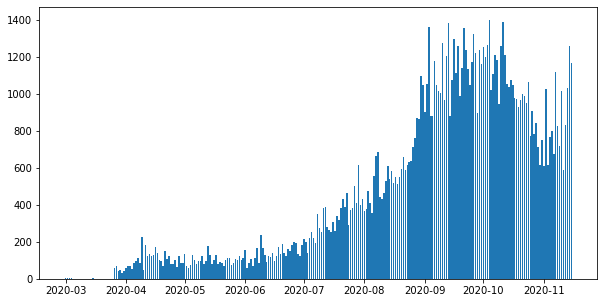

In [16]:
import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jakarta_tidy, x='tanggal', height='kasus_baru')
plt.show()

<Figure size 432x288 with 0 Axes>

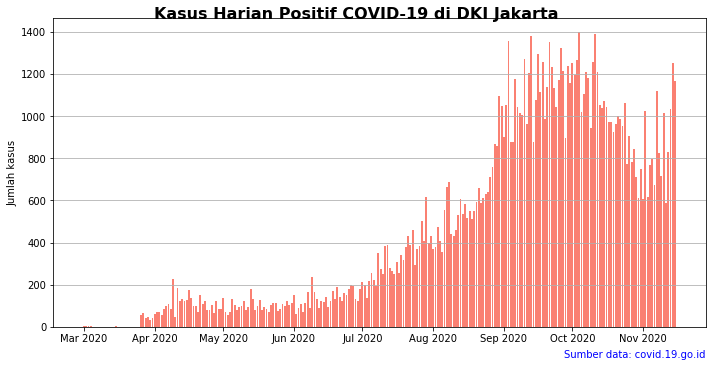

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jakarta_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di DKI Jakarta',
y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

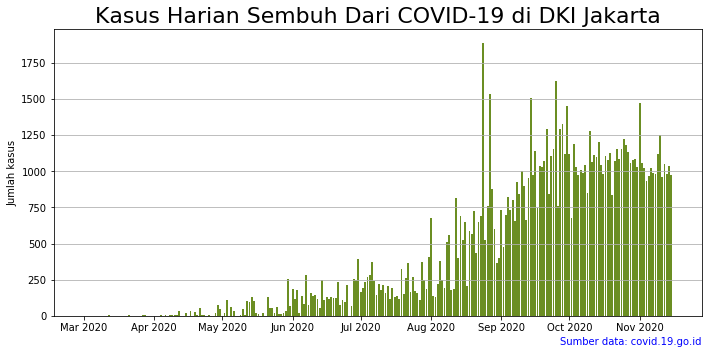

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jakarta_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di DKI Jakarta',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

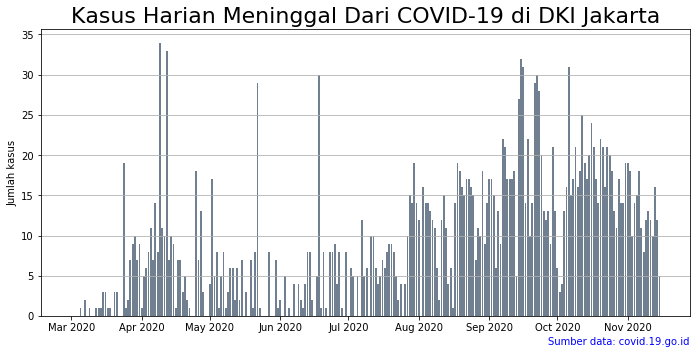

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jakarta_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di DKI Jakarta',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

Setelah mengamati grafik perkembangan kasus Anda menyadari bahwa terjadi fluktuasi pertambahan kasus harian. Dilandasi hal tersebut Anda kemudian ingin mencoba mengamati bagaimana perkembangan kasus dalam rentang waktu pekanan.

In [22]:
cov_jakarta_pekanan = (cov_jakarta_tidy.set_index('tanggal')['kasus_baru']
.resample('W')
.sum()
.reset_index()
.rename(columns={'kasus_baru': 'jumlah'})
)
cov_jakarta_pekanan['tahun'] = cov_jakarta_pekanan['tanggal'].apply(lambda x: x.year)
cov_jakarta_pekanan['pekan_ke'] = cov_jakarta_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jakarta_pekanan = cov_jakarta_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_jakarta_pekanan:')
print(cov_jakarta_pekanan.info())
print('\nLima data teratas cov_jakarta_pekanan:\n', cov_jakarta_pekanan.head())

Info cov_jakarta_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
tahun       38 non-null int64
pekan_ke    38 non-null int64
jumlah      38 non-null int64
dtypes: int64(3)
memory usage: 1.0 KB
None

Lima data teratas cov_jakarta_pekanan:
    tahun  pekan_ke  jumlah
0   2020         9       2
1   2020        10       6
2   2020        11       7
3   2020        12       3
4   2020        13     214


Pertanyaan baru muncul setelah melakukan inspeksi terhadap data cov_jabar_pekanan tersebut: "Apakah pekan ini lebih baik dari pekan kemarin?"

In [24]:
cov_jakarta_pekanan['jumlah_pekanlalu'] = cov_jakarta_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_jakarta_pekanan['lebih_baik'] = cov_jakarta_pekanan['jumlah'] < cov_jakarta_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_jakarta_pekanan.head(10))

Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020         9       2                 0       False
1   2020        10       6                 2       False
2   2020        11       7                 6       False
3   2020        12       3                 7        True
4   2020        13     214                 3       False
5   2020        14     411               214       False
6   2020        15     876               411       False
7   2020        16     895               876       False
8   2020        17     709               895        True
9   2020        18     621               709        True


## Bar Chart

<Figure size 432x288 with 0 Axes>

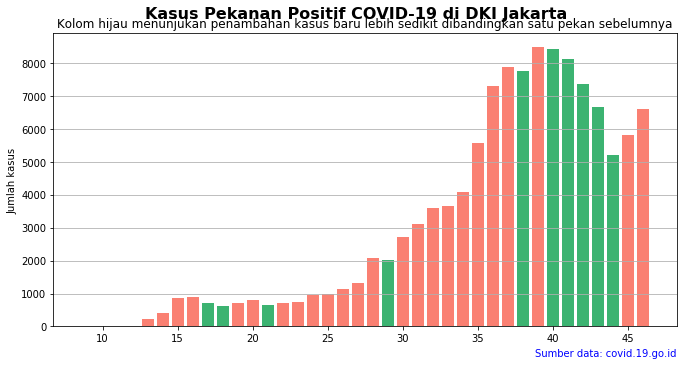

In [25]:
import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jakarta_pekanan, x='pekan_ke', height='jumlah',
color=['mediumseagreen' if x is True else 'salmon' for x in cov_jakarta_pekanan['lebih_baik']])
fig.suptitle('Kasus Pekanan Positif COVID-19 di DKI Jakarta',
y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Kolom hijau menunjukan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya',
fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Pola dan Dinamika

Ada yang akhirnya sembuh, namun tak sedikit pula yang meninggal akibat COVID-19. Sementara itu penambahan kasus baru terus terjadi di masyarakat. Hal ini mungkin memicu pertanyaan lain: "Hingga saat ini ada berapa kasus yang masih aktif?"

Aktif dalam artian sedang dalam perawatan atau isolasi.

In [27]:
cov_jakarta_akumulasi = cov_jakarta_tidy[['tanggal']].copy()
cov_jakarta_akumulasi['akumulasi_aktif'] = (cov_jakarta_tidy['kasus_baru'] - cov_jakarta_tidy['sembuh'] - cov_jakarta_tidy['meninggal']).cumsum()
cov_jakarta_akumulasi['akumulasi_sembuh'] = cov_jakarta_tidy['sembuh'].cumsum()
cov_jakarta_akumulasi['akumulasi_meninggal'] = cov_jakarta_tidy['meninggal'].cumsum()
cov_jakarta_akumulasi.tail()

,tanggal,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
255,2020-11-11,6467,105007,2382
256,2020-11-12,6235,106060,2392
257,2020-11-13,6274,107038,2408
258,2020-11-14,6478,108077,2420
259,2020-11-15,6663,109052,2425


<Figure size 432x288 with 0 Axes>

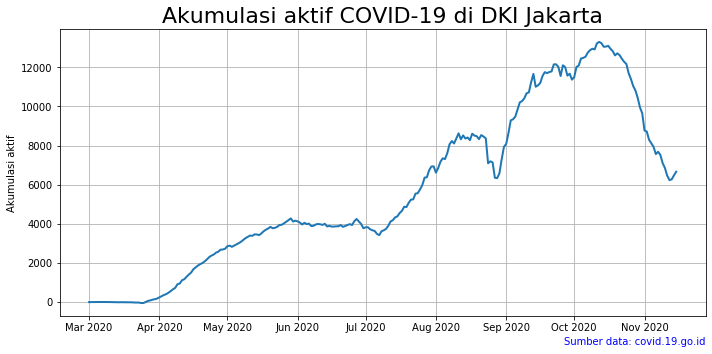

In [28]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_jakarta_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di DKI Jakarta',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

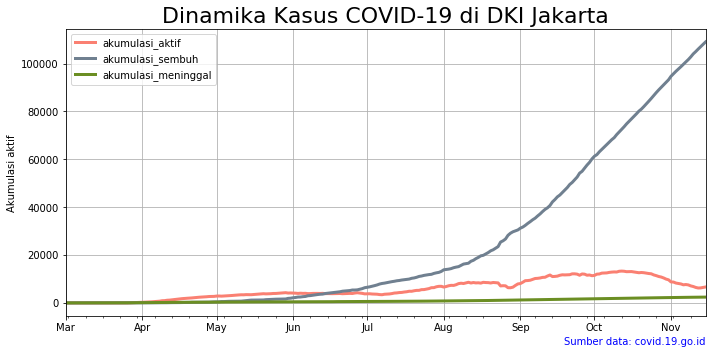

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
cov_jakarta_akumulasi.plot(x='tanggal', kind='line', ax=ax, lw=3,
color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di DKI Jakarta',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.grid()
plt.tight_layout()
plt.show()